In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [6]:
# read ecg data
ecg_data = pd.read_csv('./ecg/mitbih_train.csv', header=None)
# labels are the final column
ecg_labels = ecg_data.iloc[:, -1]
# drop the labels from the data
ecg_data = ecg_data.drop(ecg_data.columns[-1], axis=1)


In [15]:
ecg_data.shape

(87554, 187)

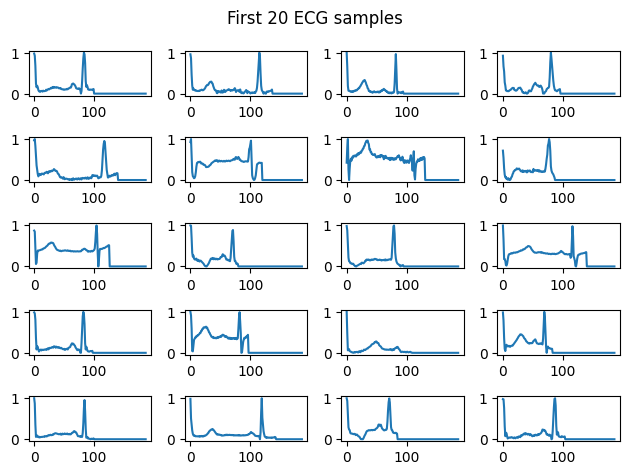

In [11]:
# plot the first 20 samples in separate subplots
fig, axs = plt.subplots(5, 4)
fig.suptitle('First 20 ECG samples')
for i in range(20):
    axs[i // 4, i % 4].plot(ecg_data.iloc[i])

plt.tight_layout()
plt.show()

In [13]:
# create a torch dataset from the data and labels
class ECGDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data.iloc[idx].values, self.labels.iloc[idx]
    
# create a dataset from the data
ecg_dataset = ECGDataset(ecg_data, ecg_labels)

# create a dataloader from the dataset
ecg_dataloader = torch.utils.data.DataLoader(ecg_dataset, batch_size=32, shuffle=True)

In [14]:
from diffusers import UNet1DModel

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [16]:
model = UNet1DModel(
    sample_size=187,
    in_channels=2,
    out_channels=1,
    layers_per_block=1,
    block_out_channels=(8, 16, 32),
    down_block_types=(
        "DownBlock1D",
        "DownBlock1D",
        "DownBlock1D",
    ),
    up_block_types=(
        "UpBlock1D",
        "UpBlock1D",
        "UpBlock1D",
    ),
)